# Qualitative comparison of the elemental abundance ratios of the bar, inner disc, and knot given the GMM fit in L

In [ ]:
# new less restrictive sample selection
# # create the parent mask
# mask = (data['SNR']>50)&(data['LOGG']<3.)&(data['LOGG']>0.)&(data['TEFF']>3500.)&(data['TEFF']<5500.)&(data['ASPCAPFLAG']==0)\
#     &(data['weighted_dist']/data['weighted_dist_error']>10)&(data['EXTRATARG']==0)&(mask_gcs==False) & (mask_gcs2==False)\
#     &(rads<5)&(data['age']>0)&(data['age']<14)&(data['LOGG_ERR']<0.2)&(data['fakemag']<500)

# print('There are '+str(len(data[mask]))+' stars in the parent sample')

# np.savetxt('/Users/dhortadarrington/Desktop/new_inner_gal_sample',data['APOGEE_ID_1'][mask],fmt='%s')

In [3]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances

path = '/Users/dhortadarrington/Documents/Master/data/dr17_dr3_McMillan_astroNN_rev1.fits'
tb = fits.open(path)
data = tb[1].data 


In [6]:
# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'GC_catalogo_14_mayo.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb2 = fits.open(path+file)
data2 = tb2[1].data
gc_star_ids = data2.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids))+' GC stars')

# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'GC_members_VAC.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb3 = fits.open(path+file)
data3 = tb3[1].data
gc_star_ids_RPS = data3.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids_RPS))+' GC stars')

There are 7562 GC stars
There are 7260 GC stars


In [7]:
apo_id = data['APOGEE_ID_1']
# Clean the initial data
mask_gcs = np.isin(list(apo_id),list(gc_star_ids))
mask_gcs2 = np.isin(list(apo_id),list(gc_star_ids_RPS))

In [19]:
rads = np.sqrt((data['Rgal']*8.178)**2+(data['Zgal']*8.178)**2)
zgal = data['Zgal']*8.178

In [26]:
# more conservative sample selection
# create the parent mask
mask = (data['SNR']>50)&(data['LOGG']<3.)&(data['LOGG']>0.)&(data['TEFF']>3500.)&(data['TEFF']<5500.)&(data['ASPCAPFLAG']==0)\
    &(data['weighted_dist']/data['weighted_dist_error']>10)&(data['EXTRATARG']==0)&(mask_gcs==False) & (mask_gcs2==False)\
    &(rads<5)&(data['age']>0)&(data['age']<14)&(data['LOGG_ERR']<0.2)&(data['fakemag']<500)&(np.abs(zgal)<0.3)


print('There are '+str(len(data[mask]))+' stars in the parent sample')

np.savetxt('/Users/dhortadarrington/Desktop/new_inner_gal_sample_thin',data['APOGEE_ID_1'][mask],fmt='%s')

There are 5273 stars in the parent sample


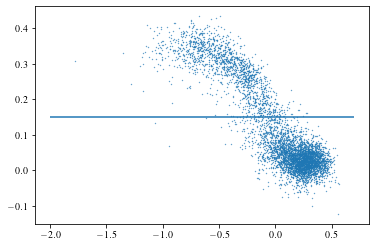

In [27]:
plt.scatter(data['FE_H'][mask],data['MG_FE'][mask],s=0.1)
plt.hlines(0.15,-2,0.7)

In [14]:
mask_lowa = (data['SNR']>100)&(data['LOGG']<3.)&(data['LOGG']>1.)&(data['TEFF']>3500.)&(data['TEFF']<5500.)&(data['ASPCAPFLAG']==0)\
    &(data['weighted_dist']/data['weighted_dist_error']>10)&(data['EXTRATARG']==0)&(mask_gcs==False) & (mask_gcs2==False)\
    &(rads<5)&(data['age']>0)&(data['age']<14)&(data['MG_FE']<0.15)&(data['FE_H']>-0.5)

print('There are '+str(len(data[mask_lowa]))+' stars in the parent sample')

np.savetxt('/Users/dhortadarrington/Desktop/new_inner_gal_sample_lowa',data['APOGEE_ID_1'][mask_lowa],fmt='%s')


There are 4561 stars in the parent sample


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')

In [94]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/bar-prob-big-2-3-cyl.fits'
tb = fits.open(path)
data = tb[1].data 


In [95]:
mask_knot = data['P_knot']>0.8
mask_bar = data['P_bar']>0.8
mask_disc = data['P_disc']>0.8

In [96]:
from scipy import stats

bin_feh = np.linspace(np.min(data['FE_H']),np.max(data['FE_H']),100)
bin_mgfe = np.linspace(np.min(data['MG_FE']),np.max(data['MG_FE']),100)

hist = stats.binned_statistic_2d(data['FE_H'],data['MG_FE'], data['P_knot'], statistic='mean', bins=[bin_feh,bin_mgfe])
vz_c = 0.5 * (hist.x_edge[:-1] + hist.x_edge[1:])
z_c = 0.5 * (hist.y_edge[:-1] + hist.y_edge[1:])
mesh_feh, mesh_mgfe = np.meshgrid(vz_c,z_c)
metric = hist[0].T

hist2 = stats.binned_statistic_2d(data['FE_H'],data['MG_FE'], data['P_bar'], statistic='mean', bins=[bin_feh,bin_mgfe])
vz_c2 = 0.5 * (hist2.x_edge[:-1] + hist2.x_edge[1:])
z_c2 = 0.5 * (hist2.y_edge[:-1] + hist2.y_edge[1:])
mesh_feh2, mesh_mgfe2 = np.meshgrid(vz_c2,z_c2)
metric2 = hist2[0].T

hist3 = stats.binned_statistic_2d(data['FE_H'],data['MG_FE'], data['P_disc'], statistic='mean', bins=[bin_feh,bin_mgfe])
vz_c3 = 0.5 * (hist3.x_edge[:-1] + hist3.x_edge[1:])
z_c3 = 0.5 * (hist3.y_edge[:-1] + hist3.y_edge[1:])
mesh_feh3, mesh_mgfe3 = np.meshgrid(vz_c3,z_c3)
metric3 = hist3[0].T


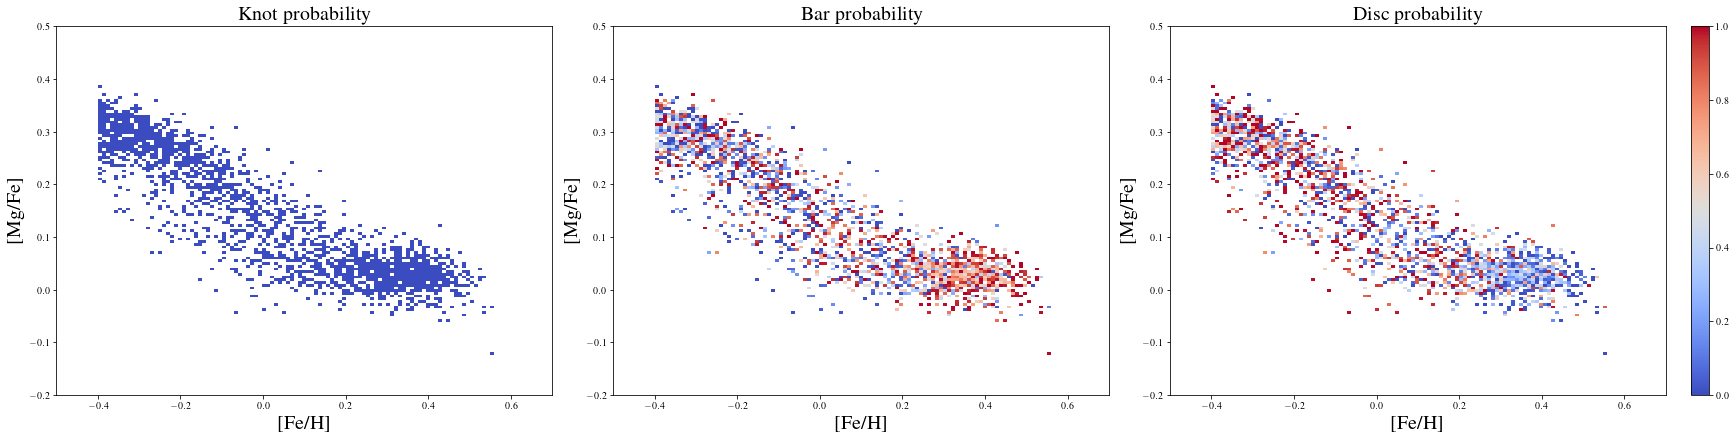

In [97]:
from matplotlib.colors import LogNorm

fig = plt.figure(constrained_layout=True,figsize=(24,6))


plt.subplot(1,3,1)
plt.title('Knot probability',fontsize=20)
plt.pcolormesh(mesh_feh,mesh_mgfe,metric,cmap='coolwarm',vmin=0.,vmax=1)
plt.xlabel('[Fe/H]',fontsize=20)
plt.ylabel('[Mg/Fe]',fontsize=20)
plt.xlim(-0.5,0.7)
plt.ylim(-0.2,0.5)

plt.subplot(1,3,2)
plt.title('Bar probability',fontsize=20)
plt.pcolormesh(mesh_feh2,mesh_mgfe2,metric2,cmap='coolwarm',vmin=0.,vmax=1)
plt.xlabel('[Fe/H]',fontsize=20)
plt.ylabel('[Mg/Fe]',fontsize=20)
plt.xlim(-0.5,0.7)
plt.ylim(-0.2,0.5)

plt.subplot(1,3,3)
plt.title('Disc probability',fontsize=20)
plt.pcolormesh(mesh_feh3,mesh_mgfe3,metric3,cmap='coolwarm',vmin=0.,vmax=1)
plt.xlabel('[Fe/H]',fontsize=20)
plt.ylabel('[Mg/Fe]',fontsize=20)
plt.xlim(-0.5,0.7)
plt.ylim(-0.2,0.5)

plt.colorbar()

Text(0, 0.5, 'Disc prob')

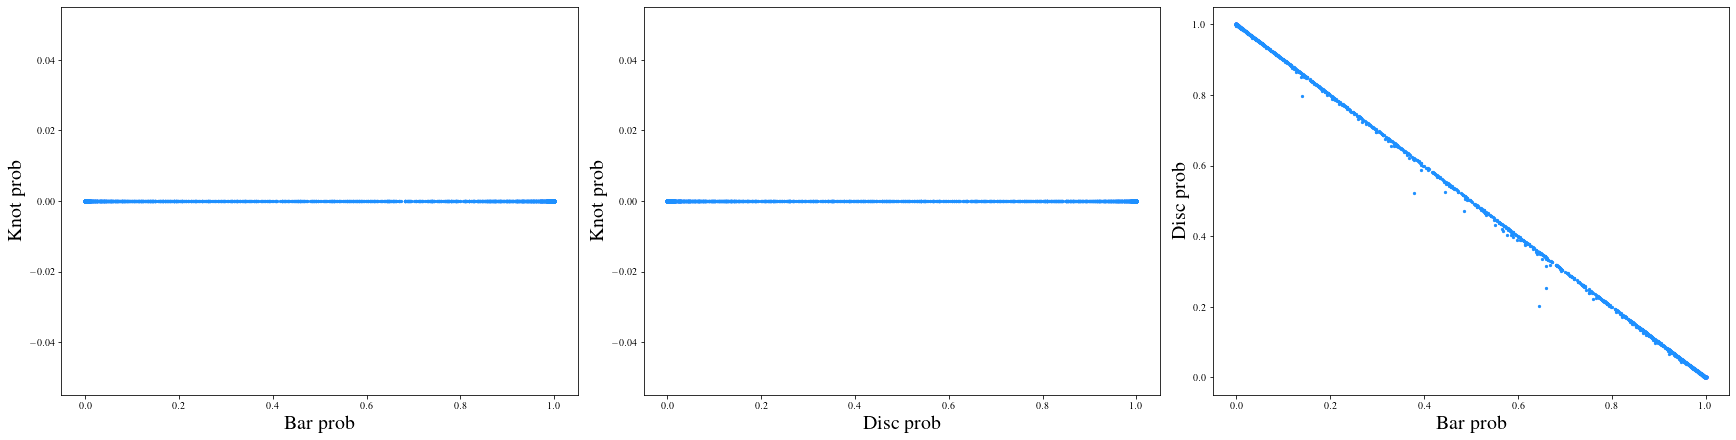

In [98]:
fig = plt.figure(constrained_layout=True,figsize=(24,6))

plt.subplot(1,3,1)
plt.scatter(data['P_bar'],data['P_knot'],s=5,c='dodgerblue')
plt.xlabel('Bar prob',fontsize=20)
plt.ylabel('Knot prob',fontsize=20)

plt.subplot(1,3,2)
plt.scatter(data['P_disc'],data['P_knot'],s=5,c='dodgerblue')
plt.xlabel('Disc prob',fontsize=20)
plt.ylabel('Knot prob',fontsize=20)

plt.subplot(1,3,3)
plt.scatter(data['P_bar'],data['P_disc'],s=5,c='dodgerblue')
plt.xlabel('Bar prob',fontsize=20)
plt.ylabel('Disc prob',fontsize=20)


# Check the MDFs and abundances

In [99]:
# run a ks test on the MDFs of the three samples

from scipy import stats

mdf_knot, bin_edges_knot = np.histogram(data['FE_H'],bins= bins_feh,weights=data['P_knot'])
mdf_bar, bin_edges_bar = np.histogram(data['FE_H'],bins= bins_feh,weights=data['P_bar'])
mdf_disc, bin_edges_disc = np.histogram(data['FE_H'],bins= bins_feh,weights=data['P_disc'])

knot_bar_ks = stats.ks_2samp(mdf_knot,mdf_bar)
knot_disc_ks = stats.ks_2samp(mdf_knot,mdf_disc)
disc_bar_ks = stats.ks_2samp(mdf_disc,mdf_bar)



In [100]:
print(knot_bar_ks)
print(knot_disc_ks)
print(disc_bar_ks)
# KS results and p-value suggest they are all different!

KstestResult(statistic=0.2, pvalue=0.9944575548290717)
KstestResult(statistic=0.2, pvalue=0.9944575548290717)
KstestResult(statistic=0.1, pvalue=1.0)


In [101]:
knot_bar_ks2 = stats.ks_2samp(data['FE_H'][mask_knot],data['FE_H'][mask_bar])
knot_disc_ks2 = stats.ks_2samp(data['FE_H'][mask_knot],data['FE_H'][mask_disc])
disc_bar_ks2 = stats.ks_2samp(data['FE_H'][mask_disc],data['FE_H'][mask_bar])

ValueError: Data passed to ks_2samp must not be empty

In [ ]:
print(knot_bar_ks2)
print(knot_disc_ks2)
print(disc_bar_ks2)

There is either metallicity gradients in the MW's bar, or the knot is the most metal-rich bit of the Bar?

# Do the same for ages

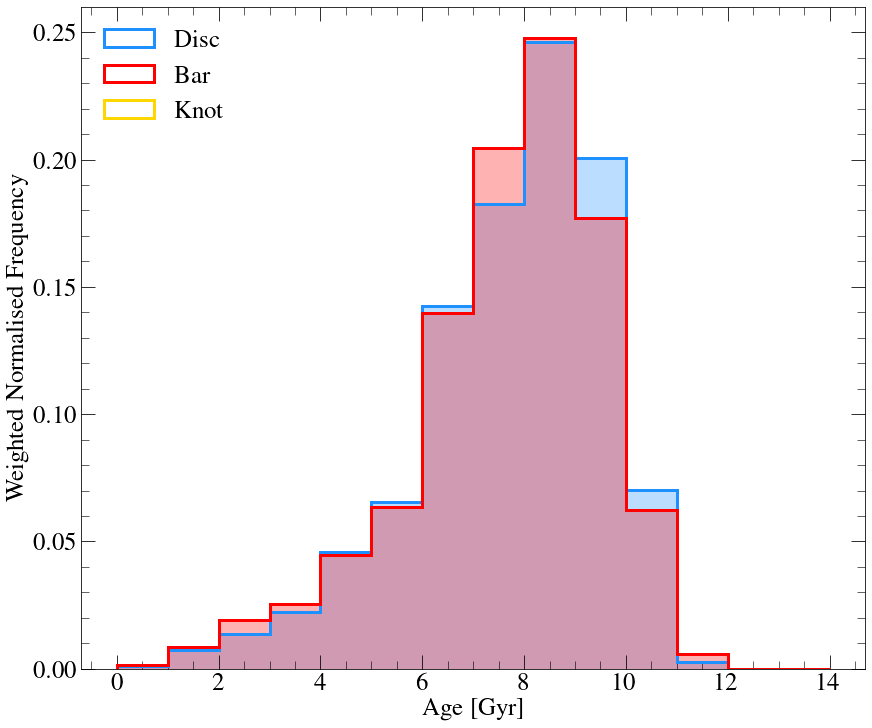

In [102]:
bins_feh = np.linspace(0,14,15)

fig = plt.figure(constrained_layout=True,figsize=(12,10))

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['age_lowess_correct'],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['P_disc'])
plt.hist(data['age_lowess_correct'],bins_feh,color='dodgerblue',histtype='step',lw=3,density=True,label='Disc',weights=data['P_disc'])

plt.hist(data['age_lowess_correct'],bins_feh,color='r',alpha=0.3,density=True,weights=data['P_bar'])
plt.hist(data['age_lowess_correct'],bins_feh,color='r',histtype='step',lw=3,density=True,label='Bar',weights=data['P_bar'])

plt.hist(data['age_lowess_correct'],bins_feh,color='gold',alpha=0.3,density=True,weights=data['P_knot'])
plt.hist(data['age_lowess_correct'],bins_feh,color='gold',histtype='step',lw=3,density=True,label='Knot',weights=data['P_knot'])

plt.xlabel('Age [Gyr]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.ylim(0,2.5)


In [103]:
# run a ks test on the MDFs of the three samples

from scipy import stats

age_knot, bin_edges_knot = np.histogram(data['age_lowess_correct'],bins= bins_feh,weights=data['P_knot'])
age_bar, bin_edges_bar = np.histogram(data['age_lowess_correct'],bins= bins_feh,weights=data['P_bar'])
age_disc, bin_edges_disc = np.histogram(data['age_lowess_correct'],bins= bins_feh,weights=data['P_disc'])

knot_bar_ks = stats.ks_2samp(age_knot,age_bar)
knot_disc_ks = stats.ks_2samp(age_knot,age_disc)
disc_bar_ks = stats.ks_2samp(age_disc,age_bar)



In [104]:
print(knot_bar_ks)
print(knot_disc_ks)
print(disc_bar_ks)
# KS results and p-value suggest they are all the same!

KstestResult(statistic=0.8571428571428571, pvalue=1.8845066630771294e-05)
KstestResult(statistic=0.8571428571428571, pvalue=1.8845066630771294e-05)
KstestResult(statistic=0.07142857142857142, pvalue=1.0)


# Get the weighted Kiel diagram

In [105]:
teff_all = data['TEFF']
logg_all = data['LOGG']
data_all = np.array([teff_all,logg_all])

teff_knot = data['TEFF'][mask_knot]
logg_knot = data['LOGG'][mask_knot]
data_knot = np.array([teff_knot,logg_knot])

teff_bar = data['TEFF'][mask_bar]
logg_bar = data['LOGG'][mask_bar]
data_bar = np.array([teff_bar,logg_bar])

teff_disc = data['TEFF'][mask_disc]
logg_disc = data['LOGG'][mask_disc]
data_disc = np.array([teff_disc,logg_disc])


In [106]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


ValueError: `dataset` input should have multiple elements.

(3.0, 0.0)

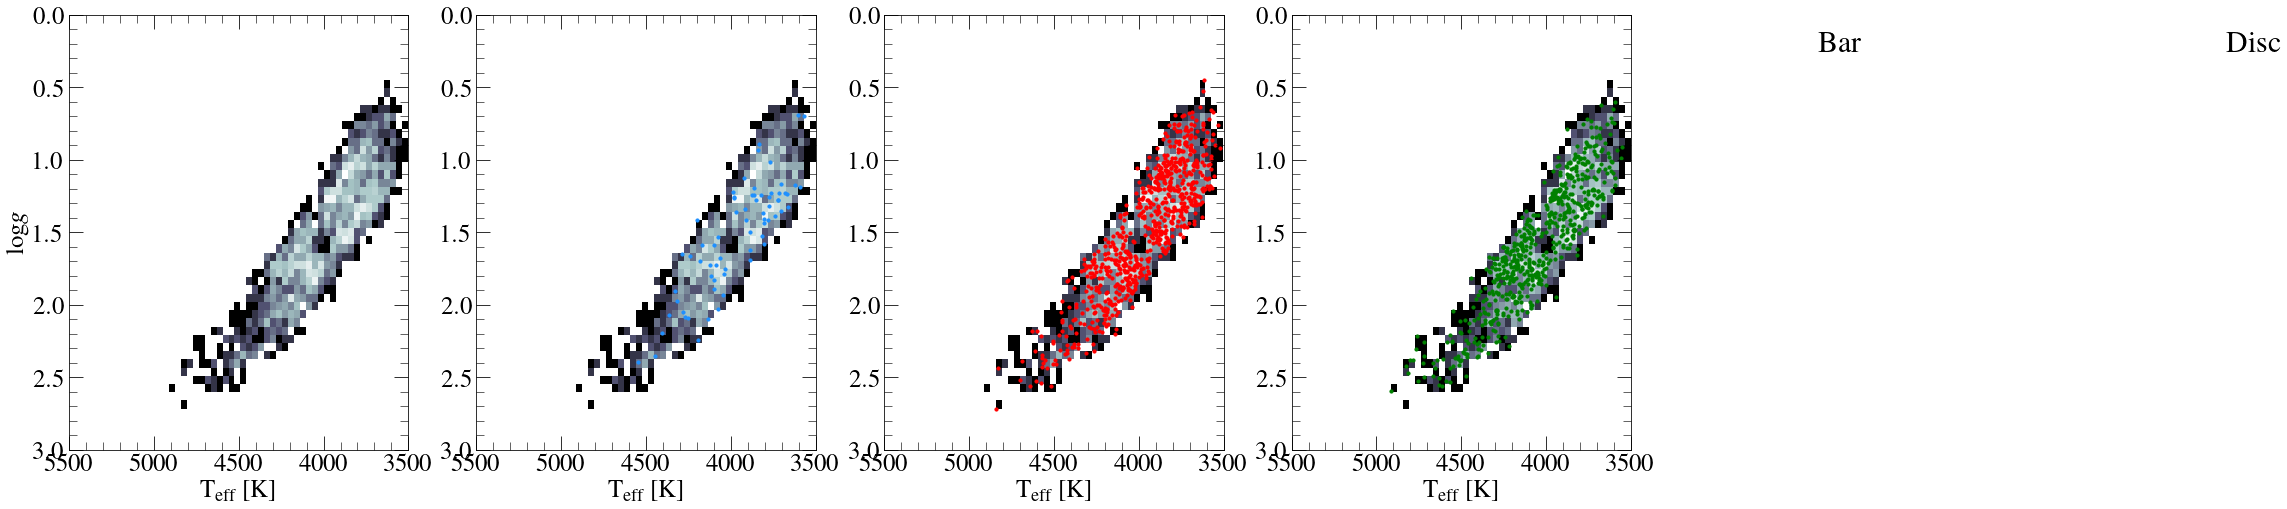

In [73]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,8),facecolor='white')


axes[0].text(0.3,0.25,'All',fontsize=30)
axes[0].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
# color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-4,4,-4,4])
# axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=6,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
axes[0].set_ylabel('log$g$',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
# cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')
axes[0].set_xlim(5500,3500)
axes[0].set_ylim(3,0)

# axes[0].subplot(1,3,1)
# axes[0].title('Knot',fontsize=20)
axes[1].text(0.3,0.25,'Knot',fontsize=30)
axes[1].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
# color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-4,4,-4,4])
# axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
axes[1].scatter(data['TEFF'][mask_knot],data['LOGG'][mask_knot],s=10,c='dodgerblue')
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
# cax = axes[1].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')
axes[1].set_xlim(5500,3500)
axes[1].set_ylim(3,0)

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(0.3,0.25,'Bar',fontsize=30)
axes[2].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
axes[2].scatter(data['TEFF'][mask_bar],data['LOGG'][mask_bar],s=10,c='r')
# color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-4,4,-4,4])
# axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()
axes[2].set_xlim(5500,3500)
axes[2].set_ylim(3,0)
# axes[1].colorbar(color2, aspect=40)
# cax = axes[2].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(0.3,0.25,'Disc',fontsize=30)
axes[3].hist2d(data['TEFF'],data['LOGG'],bins=40,cmap='bone',norm=LogNorm())
axes[3].scatter(data['TEFF'][mask_disc],data['LOGG'][mask_disc],s=10,c='g')
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-4,4,-4,4])
# axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('T$_{\mathrm{eff}}$ [K]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()
axes[3].set_xlim(5500,3500)
axes[3].set_ylim(3,0)

# cax = axes[3].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
# cbar.ax.tick_params(labelsize=21)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')


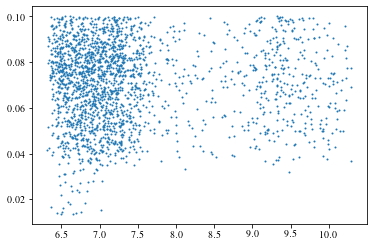

In [74]:
# good_idx = ((np.abs(astronn_VAC_f['dist_model_error']/astronn_VAC_f['dist'])<0.5) & (astronn_VAC_f['dist']<2e10) & (astronn_VAC_f['fakemag']<500) & (astronn_VAC_f['LOGG_ERR']<0.2))
# plt.hist(data['fakemag'])
plt.scatter(data['weighted_dist']/1000,data['weighted_dist_error']/data['weighted_dist'],s=1)


# Get the weighted Tinsley Diagram for stars with 0.5 < logg < 1.5

In [75]:
fe_all = data['FE_H'][(data['LOGG']<1.5)]
mg_all = data['MG_FE'][(data['LOGG']<1.5)]
data_all = np.array([fe_all,mg_all])

fe_knot = data['FE_H'][mask_knot&(data['LOGG']<1.5)]
mg_knot = data['MG_FE'][mask_knot&(data['LOGG']<1.5)]
data_knot = np.array([fe_knot,mg_knot])

fe_bar = data['FE_H'][mask_bar&(data['LOGG']<1.5)]
mg_bar = data['MG_FE'][mask_bar&(data['LOGG']<1.5)]
data_bar = np.array([fe_bar,mg_bar])

fe_disc = data['FE_H'][mask_disc&(data['LOGG']<1.5)]
mg_disc = data['MG_FE'][mask_disc&(data['LOGG']<1.5)]
data_disc = np.array([fe_disc,mg_disc])


In [76]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


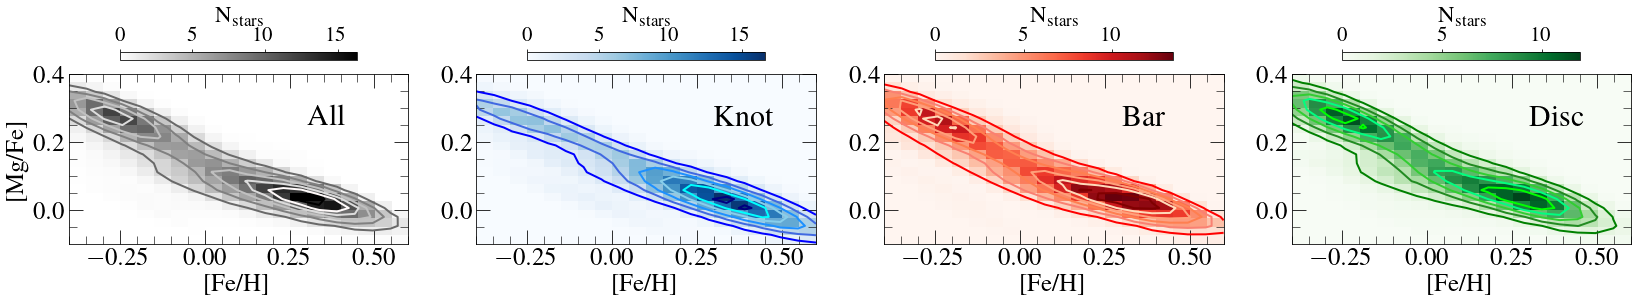

In [77]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,8),facecolor='white')


axes[0].text(0.3,0.25,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=6,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('[Fe/H]',fontsize=25)
axes[0].set_ylabel('[Mg/Fe]',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,1)
# axes[1].title('Knot',fontsize=20)
axes[1].text(0.3,0.25,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('[Fe/H]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(0.3,0.25,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.4, 0.6,-0.1, 0.4])
axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('[Fe/H]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(0.3,0.25,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.4, 0.6,-0.1, 0.4])
axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('[Fe/H]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()

cax = axes[3].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


In [82]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances
path2 = '/Users/dhortadarrington/Documents/Master/data/dr17_dr3_McMillan_astroNN_rev1.fits'
tb2 = fits.open(path2)
data2 = tb2[1].data 


In [83]:
#  check the tinsley diagram for thin disc in solar neighbourhood
zgal2 = data2['Zgal']*8.178
Rgal2 = data2['Rgal']*8.178
fe_disc_solar = data2['FE_H'][(Rgal2<9.)&(Rgal2>7.)&(data2['LOGG']<1.5)&(data2['FE_H']>-0.8)&(data2['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
mg_disc_solar = data2['MG_FE'][(Rgal2<9.)&(Rgal2>7.)&(data2['LOGG']<1.5)&(data2['FE_H']>-0.8)&(data2['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
data_disc_solar = np.array([fe_disc_solar,mg_disc_solar])



In [84]:
k_disc_solar = kde.gaussian_kde(data_disc_solar)
nbins=20
xi_disc_solar, yi_disc_solar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc_solar = k_disc_solar(np.vstack([xi_disc_solar.flatten(), yi_disc_solar.flatten()]))


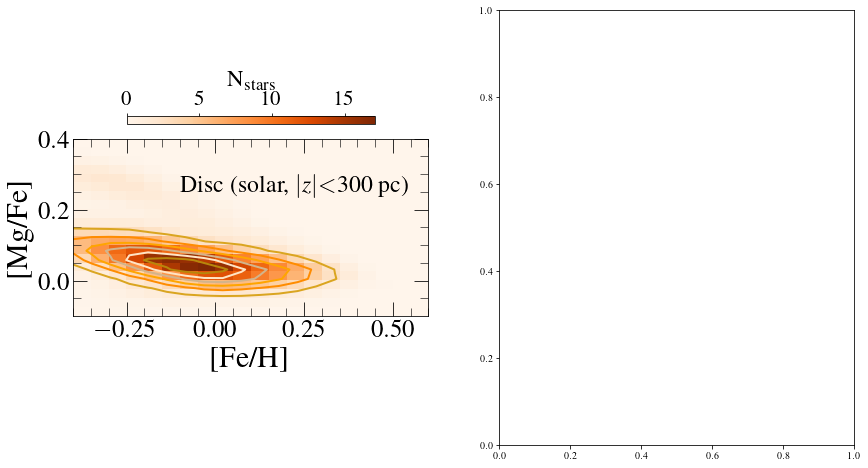

In [85]:
colores4 = ['darkgoldenrod','goldenrod','darkorange','orange','tan','bisque']

fig, axes = plt.subplots(1, 2,figsize=(14,8),facecolor='white')


axes[0].text(-0.1,0.25,'Disc (solar, $|z|$$<$300 pc)',fontsize=24)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_disc_solar.reshape(xi_disc_solar.shape)),cmap='Oranges',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0].contour(xi_disc_solar, yi_disc_solar, zi_disc_solar.reshape(xi_disc_solar.shape),levels=6,colors=colores4,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('[Fe/H]',fontsize=30)
axes[0].set_ylabel('[Mg/Fe]',fontsize=30)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# Do it also for all stars with $|$Z$|$$<$0.3 kpc

In [89]:
zgal = (data['Zgal']*8.178)
Rgal = data['Rgal']*8.178


In [90]:
mask_z = (np.abs(zgal)<0.3)&(data['LOGG']<1.5)

(0.0, 4.5)

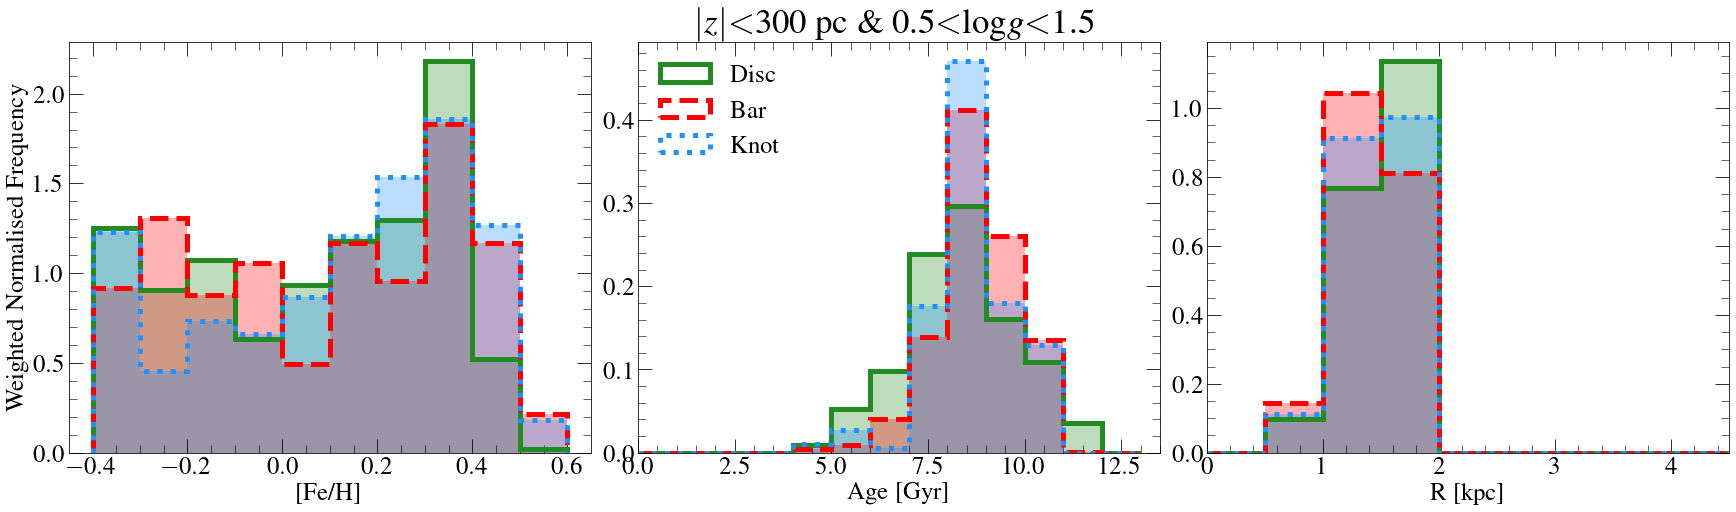

In [91]:
plt.figure(figsize=(24,7),constrained_layout=True,facecolor='white')


plt.subplot(1,3,1)
bins_feh = np.linspace(-0.4,0.6,11)

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['FE_H'][mask_z],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['P_disc'][mask_z])
plt.hist(data['FE_H'][mask_z],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['P_disc'][mask_z])

plt.hist(data['FE_H'][mask_z],bins_feh,color='r',alpha=0.3,density=True,weights=data['P_bar'][mask_z])
plt.hist(data['FE_H'][mask_z],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['P_bar'][mask_z],ls='dashed')

plt.hist(data['FE_H'][mask_z],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['P_knot'][mask_z])
plt.hist(data['FE_H'][mask_z],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['P_knot'][mask_z],ls='dotted')

plt.xlabel('[Fe/H]',fontsize=25)
plt.ylabel('Weighted Normalised Frequency',fontsize=25)
# plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
# plt.ylim(0,2.5)

plt.subplot(1,3,2)
plt.title(r'$|z|$$<$300 pc $\&$ 0.5$<$log$g$$<$1.5',fontsize=35)
bins_feh = np.linspace(0,13,14)

# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['P_disc'][mask_z])
plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['P_disc'][mask_z])

plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='r',alpha=0.3,density=True,weights=data['P_bar'][mask_z])
plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['P_bar'][mask_z],ls='dashed')

plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['P_knot'][mask_z])
plt.hist(data['age_lowess_correct'][mask_z],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['P_knot'][mask_z],ls='dotted')

plt.xlabel('Age [Gyr]',fontsize=25)
# plt.ylabel('Weighted Normalised Frequency',fontsize=25)
plt.legend(loc='upper left',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,13.5)

plt.subplot(1,3,3)
bins_feh = np.linspace(0,5,11)
# plt.hist(data['FE_H'],bins_feh,color='k',alpha=0.3,density=True)
# plt.hist(data['FE_H'],bins_feh,color='k',histtype='step',lw=3,density=True,label='all')

plt.hist(Rgal[mask_z],bins_feh,color='forestgreen',alpha=0.3,density=True,weights=data['P_disc'][mask_z])
plt.hist(Rgal[mask_z],bins_feh,color='forestgreen',histtype='step',lw=5,density=True,label='Disc',weights=data['P_disc'][mask_z])

plt.hist(Rgal[mask_z],bins_feh,color='r',alpha=0.3,density=True,weights=data['P_bar'][mask_z])
plt.hist(Rgal[mask_z],bins_feh,color='r',histtype='step',lw=5,density=True,label='Bar',weights=data['P_bar'][mask_z],ls='dashed')

plt.hist(Rgal[mask_z],bins_feh,color='dodgerblue',alpha=0.3,density=True,weights=data['P_knot'][mask_z])
plt.hist(Rgal[mask_z],bins_feh,color='dodgerblue',histtype='step',lw=5,density=True,label='Knot',weights=data['P_knot'][mask_z],ls='dotted')

plt.xlabel('R [kpc]',fontsize=25)
# plt.ylabel('Weighted Normalised Frequency',fontsize=25)
# plt.legend(loc='upper right',frameon=False,fontsize=25)

plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,4.5)


In [92]:
# run a ks test on the MDFs of the three samples

from scipy import stats

age_knot, bin_edges_knot = np.histogram(data['age_lowess_correct'][mask_z],bins= bins_feh,weights=data['P_knot'][mask_z])
age_bar, bin_edges_bar = np.histogram(data['age_lowess_correct'][mask_z],bins= bins_feh,weights=data['P_bar'][mask_z])
age_disc, bin_edges_disc = np.histogram(data['age_lowess_correct'][mask_z],bins= bins_feh,weights=data['P_disc'][mask_z])

knot_bar_ks = stats.ks_2samp(age_knot,age_bar)
knot_disc_ks = stats.ks_2samp(age_knot,age_disc)
disc_bar_ks = stats.ks_2samp(age_disc,age_bar)


In [93]:
print(knot_bar_ks)
print(knot_disc_ks)
print(disc_bar_ks)
# KS results and p-value suggest they are all the same!

KstestResult(statistic=0.1, pvalue=1.0)
KstestResult(statistic=0.1, pvalue=1.0)
KstestResult(statistic=0.1, pvalue=1.0)
